<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/Keras_NeuaralNt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Network in python using popular deep learning libraries, here we're using tensorflow.keras

In [10]:
# !pip install tensorflow

*  tensorflow -> This is the main library, like the kitchen itself. It provides all the fundamental power for machine learning.

*  keras -> This is a part of TensorFlow that's like a set of super easy-to-use cooking tools (pre-made dough, measuring cups, etc).

Keras is a high-level deep learning API.  It makes building our AI brain much simpler. We grab layers and models to build the structure.

*  mnist ->> This is the famous dataset of handwritten digits we'll use for training. It's included right in Keras!

*  to_categorical ->> A special helper tool we'll use to format our labels. More on this in a bit.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

loading dataset
28x28 pixel image of hand written numbers, we are dividing the dataset in test train sets

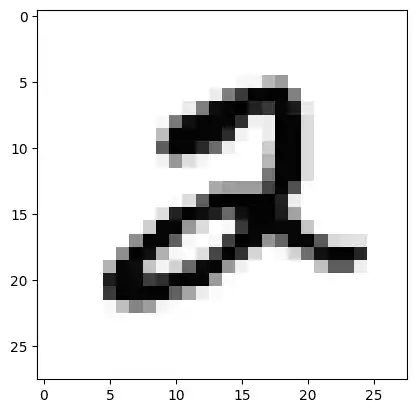

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Preprocessing the data


*  Reshaping ->> Each image is a square of 28x28 pixels. We flatten this 28x28 square into a single, long line of 784 pixels.

*  Normalizing ->> The color of each pixel is represented by a number from 0 (black) to 255 (white). To make it easier for the network to learn, we scale these values down to be between 0 and 1.

*  One-Hot Encoding Labels ->> to_categorical to turn the number 5 into an array of 10 slots, where only the 6th slot (for the digit 5) is "hot" (or 1) and the rest are 0.

5 becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
x_train = x_train.reshape((-1, 28*28)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28*28)).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### model building

*  Layer.dense ->> A "Dense" layer is a basic layer where every neuron is connected to every neuron in the next layer.

First Layer - Has 128 artificial neurons.

Input Layer - a flat line of 784 numbers, definer by (input_shape=(784,))

Second Layer - A hidden layer with 64 neurons

Output layer - It must have 10 neurons, one for each possible digit (0-9)

*  Activations ->>

  *  activation='relu': This acts like a switch. If a neuron's output is positive, it passes it on; if it's negative, it just outputs zero

  *  activation='softmax': This is special for the last layer. It takes the outputs of the 10 neurons and squashes them into 10 probabilities that all add up to 1. The highest probability is the network's final guess

In [12]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='Hidden_1'),
    layers.Dense(64, activation='relu', name='Hidden_2'),
    layers.Dense(10, activation='softmax', name='Output')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### compiling the model

Learning process configuration -
*  optimizer='adam' ->> The optimizer is the algorithm that adjusts the network's internal connections to get better.
*  loss='categorical_crossentropy' ->> The loss function measures how wrong the model's prediction is compared to the true answer.

Its a perfect partner with softmax activation function.

*  metrics=['accuracy'] ->>model tries to reduce the "loss," we want to see the accuracy

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### model training

*  model.fit() ->> This is the command that starts the training loop.

*  epochs=5 ->> An epoch is one full pass through the entire training dataset. We're telling the model to go through all 60,000 images 5 times to get better at its task.

*  batch_size=32 ->> Instead of showing the model all 60,000 images at once, we show it small groups, or batches, of 32 images at a time.


*  validation_split=0.1 ->> We take 10% of our training data and set it aside as a validation set. by every epoch, the model will test itself on this validation set to check its progress.

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8620 - loss: 0.4709 - val_accuracy: 0.9602 - val_loss: 0.1349
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9655 - loss: 0.1144 - val_accuracy: 0.9707 - val_loss: 0.0932
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9760 - loss: 0.0768 - val_accuracy: 0.9777 - val_loss: 0.0804
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9822 - loss: 0.0551 - val_accuracy: 0.9780 - val_loss: 0.0815
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9857 - loss: 0.0442 - val_accuracy: 0.9783 - val_loss: 0.0754


### Evaluating the model -
model.evaluate() on the test data

In [8]:
correct = 0
total = 0

In [9]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0895
Test Accuracy: 0.9777
